# Building a cats/dogs classifier using a Convolution Neural Network (CNN)

###### Step 1: You should install the packages first. You can uncomment the cells below to install them one by one.

The syntax to be followed is pip install [package name]

In [25]:
# pip install keras

In [111]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers
from keras import layers

If the packages are installed correctly, the above cell should run without any error

##### Step 2: Setting up the constants

Change the below paths accordingly

In [29]:
base_path = 'C:/code/catsdogs/data/'

# dimensions of our images.
img_width, img_height = 150, 150
train_data_dir = base_path + 'train'
validation_data_dir = base_path + 'validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 10
batch_size = 16

C:/code/catsdogs/data/train/cats/cat.10.jpg


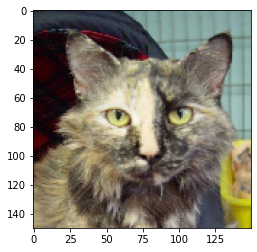

In [35]:
# Check how the data looks

img_path = train_data_dir + '/cats/cat.10.jpg'
print(img_path)
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

C:/code/catsdogs/data/train/dogs/dog.20.jpg


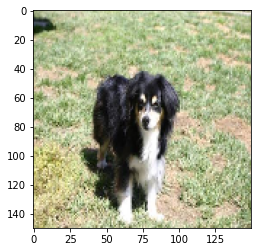

In [37]:
img_path = train_data_dir + '/dogs/dog.20.jpg'
print(img_path)
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

##### Step 3: Setting up the model

In [38]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
# Setup the data for training
# We transform the input images using different operations like zoom, shear to create more variations 
# and learn a better model
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2001 images belonging to 2 classes.
Found 901 images belonging to 2 classes.


In [40]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Epoch 1/10
126/125 [==============================] - 51s 408ms/step - loss: 0.7043 - acc: 0.5400 - val_loss: 0.6697 - val_acc: 0.6182
Epoch 2/10
126/125 [==============================] - 47s 372ms/step - loss: 0.6643 - acc: 0.6173 - val_loss: 0.6131 - val_acc: 0.6659
Epoch 3/10
126/125 [==============================] - 46s 366ms/step - loss: 0.6235 - acc: 0.6577 - val_loss: 0.6210 - val_acc: 0.6459
Epoch 4/10
126/125 [==============================] - 46s 368ms/step - loss: 0.6063 - acc: 0.6723 - val_loss: 0.5863 - val_acc: 0.6903
Epoch 5/10
126/125 [==============================] - 47s 372ms/step - loss: 0.6001 - acc: 0.6865 - val_loss: 0.6151 - val_acc: 0.6637
Epoch 6/10
126/125 [==============================] - 51s 406ms/step - loss: 0.5683 - acc: 0.7153 - val_loss: 0.6243 - val_acc: 0.6304
Epoch 7/10
126/125 [==============================] - 48s 383ms/step - loss: 0.5599 - acc: 0.7265 - val_loss: 0.5525 - val_acc: 0.7236
Epoch 8/10
126/125 [==============================] - 5

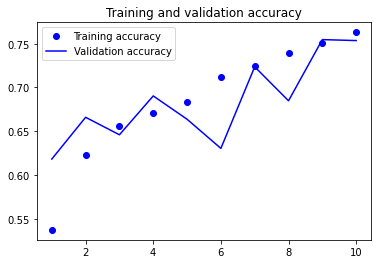

In [42]:
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, validation_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Using pre-trained network (VGGNet in this case)

Specifically, instead of using the train data directly to train the network, we pass it through the pre-trained network to get its predictions. In effect, we have converted the train data into some features. Now we use these features to train this network

In [45]:
from keras.applications import VGG16
# Loading VGGNet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [48]:
# Summary of this network, it has 14,714,688 parameters. We are going to use this network to convert each image in our training set into a set of numbers of features
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [103]:
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in train_generator:
        if i % 10 == 0:
            print('Batch ' + str(i))
        if (i + 1) * batch_size >= sample_count:
            break
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1

    return features, labels

Convert the images which are of dimensions 150 * 150 * 3 into a representation which is 4 * 4 * 512

In [82]:
train_features, train_labels = extract_features(train_generator,1500)

Batch 0
Batch 1
Batch 2
Batch 3
Batch 4
Batch 5
Batch 6
Batch 7
Batch 8
Batch 9
Batch 10
Batch 11
Batch 12
Batch 13
Batch 14
Batch 15
Batch 16
Batch 17
Batch 18
Batch 19
Batch 20
Batch 21
Batch 22
Batch 23
Batch 24
Batch 25
Batch 26
Batch 27
Batch 28
Batch 29
Batch 30
Batch 31
Batch 32
Batch 33
Batch 34
Batch 35
Batch 36
Batch 37
Batch 38
Batch 39
Batch 40
Batch 41
Batch 42
Batch 43
Batch 44
Batch 45
Batch 46
Batch 47
Batch 48
Batch 49
Batch 50
Batch 51
Batch 52
Batch 53
Batch 54
Batch 55
Batch 56
Batch 57
Batch 58
Batch 59
Batch 60
Batch 61
Batch 62
Batch 63
Batch 64
Batch 65
Batch 66
Batch 67
Batch 68
Batch 69
Batch 70
Batch 71
Batch 72
Batch 73
Batch 74
Batch 75
Batch 76
Batch 77
Batch 78
Batch 79
Batch 80
Batch 81
Batch 82
Batch 83
Batch 84
Batch 85
Batch 86
Batch 87
Batch 88
Batch 89
Batch 90
Batch 91
Batch 92
Batch 93


In [104]:
validation_features, validation_labels = extract_features(validation_generator, 900)

Batch 0
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50


In [123]:
# Flatten the features
train_features = np.reshape(train_features, (1500, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (900, 4 * 4 * 512))

In [124]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [125]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss="binary_crossentropy",
              metrics=['accuracy'])
    

In [126]:
history = model.fit(train_features, train_labels, epochs = 30, batch_size = 20, validation_data=(validation_features, validation_labels))

Train on 1500 samples, validate on 900 samples
Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6523 - acc: 0.6187 - val_loss: 0.5024 - val_acc: 0.7922
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5021 - acc: 0.7513 - val_loss: 0.4379 - val_acc: 0.8244
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4211 - acc: 0.8153 - val_loss: 0.3901 - val_acc: 0.8367
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3826 - acc: 0.8313 - val_loss: 0.3656 - val_acc: 0.8444
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3441 - acc: 0.8653 - val_loss: 0.3493 - val_acc: 0.8467
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3294 - acc: 0.8667 - val_loss: 0.3370 - val_acc: 0.8489
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2947 - acc: 0.8880 - val_loss: 0.3350 - val_acc: 0.8600
Epoch 8/30
1500

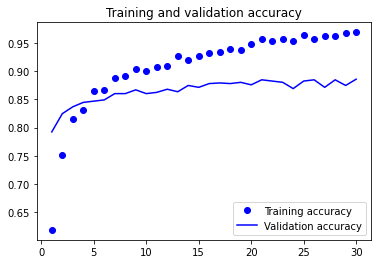

In [127]:
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, validation_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

As you can see from the above plot, by using a pre-trained network, we can get a better model as well as faster performance

C:/code/catsdogs/data/test/dogs/dog.1838.jpg


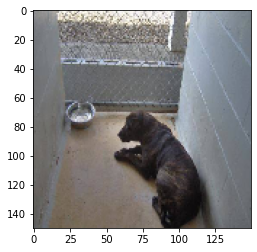

In [171]:
# Now you can point any image to this model and get its prediction. This is what you will use in run-time
img_path = 'C:/code/catsdogs/data/test/dogs/dog.1838.jpg'
print(img_path)
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

In [172]:
test_instance = image.img_to_array(img)

In [173]:
test_instance.shape

(150, 150, 3)

In [174]:
test_instance = test_instance.reshape((1,) + test_instance.shape)
test_instance_feature = conv_base.predict(test_instance)

In [175]:
test_instance_feature.shape
# flatten the features
test_instance_feature = np.reshape(test_instance_feature, (1, 4 * 4 * 512))

In [176]:
prediction = model.predict_proba(test_instance_feature)

In [177]:
prediction

array([[0.7223589]], dtype=float32)

C:/code/catsdogs/data/test/dogs/dog.1795.jpg


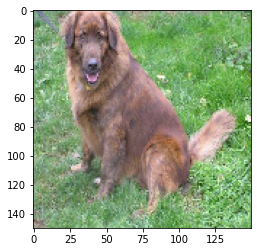

[[1.]]


In [179]:
# Now you can point any image to this model and get its prediction. This is what you will use in run-time
img_path = 'C:/code/catsdogs/data/test/dogs/dog.1795.jpg'
print(img_path)
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()
test_instance = image.img_to_array(img)
test_instance = test_instance.reshape((1,) + test_instance.shape)
test_instance_feature = conv_base.predict(test_instance)
test_instance_feature = np.reshape(test_instance_feature, (1, 4 * 4 * 512))
prediction = model.predict_proba(test_instance_feature)
print(prediction)
    

This is one variation where we took the pre-trained network to featurize the data. There are other variations like 1. You can make the pre-trained network as part of your network and train jointly. 2. You can train the pre-trained network jointly along with your data